###### import

In [1]:
import pandas as pd

In [2]:
url = "boston.xls"
df = pd.read_excel(url)

In [3]:
df_copy = df.copy()

In [27]:
#df.info()
df.describe()

,CRIM,ZN,CHAS,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,0.069170,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,0.253994,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,0.000000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,0.000000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,0.000000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [5]:
df = df.drop(['INDUS','NOX'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   CHAS    506 non-null    int64  
 3   RM      506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   RAD     506 non-null    int64  
 7   TAX     506 non-null    int64  
 8   PT      506 non-null    float64
 9   B       506 non-null    float64
 10  LSTAT   506 non-null    float64
 11  MV      506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


###### import

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [9]:
x = ss.fit_transform(df.iloc[0:,:11])
# x = df.iloc[0:,:11]

In [10]:
# y = ss.fit_transform(df[['MV']])
y = df[['MV']]

###### import

In [11]:
from sklearn.model_selection import train_test_split as tts

###### split data into 70-30

In [12]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=.30, random_state=40)

In [13]:
# print(len(x_train), len(x_test), len(y_train), len(y_test))
x_train

array([[-0.40254357,  0.58526684, -0.27259857, ...,  0.57539476,
         0.37285357, -0.81203557],
       [ 5.53032087, -0.48772236, -0.27259857, ...,  0.80657598,
        -3.88219459, -0.35647084],
       [ 0.24376194, -0.48772236, -0.27259857, ...,  0.80657598,
         0.39905855, -0.68868269],
       ...,
       [-0.40369567,  0.04877224, -0.27259857, ..., -1.50523665,
         0.44105189,  0.91070015],
       [-0.40722178, -0.48772236,  3.66839786, ..., -0.95040181,
         0.40640448, -0.30180302],
       [-0.38520164, -0.48772236, -0.27259857, ...,  0.52915835,
         0.44105189, -0.91155897]])

###### import

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
# fit the model using train data
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# predict the all test data
y_pred = model.predict(x_test)

In [44]:
# d = {'y_true': [y_test], 'y_pred': [y_pred]}
# pd.DataFrame(data=d)

###### import

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test,y_pred)

0.7176815171659034

###### import

In [20]:
from sklearn.linear_model import Lasso, Ridge

###### lasso

In [21]:
lasso = Lasso(alpha=.005)
lasso.fit(x_train, y_train)
l_pre = lasso.predict(x_test)
r2_score(y_test, l_pre)

0.717049499954657

###### ridge

In [22]:
ridge = Ridge(alpha=.005)
ridge.fit(x_train, y_train)
r_pre = ridge.predict(x_test)
r2_score(y_test, r_pre)

0.7176785604825532

###### prediction line

###### impors

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MV'>

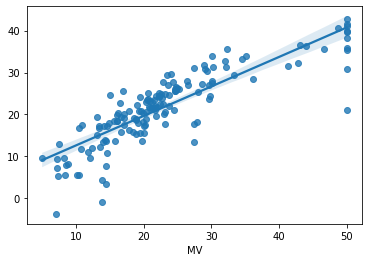

In [24]:
# print(len(x_test),len(y_test),len)
sns.regplot(y_test ,y_pred)

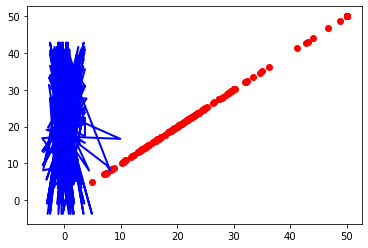

In [25]:
plt.scatter(y_test, y_test, color="red")
plt.plot(x_test, y_pred, color="blue", linewidth=2)

NameError: name 'y_pre' is not defined

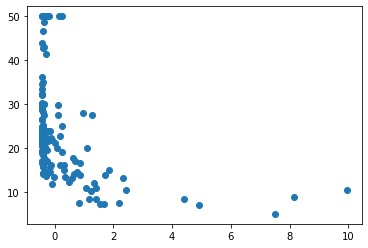

In [26]:
plt.scatter(x_test[:,0:1],y_test)
plt.plot(x_test[:,0:1], y_pre, color="blue", linewidth=3)

In [ ]:
# import matplotlib.pyplot as plt

# plt.style.use('default')
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(7, 3.5))

# ax.plot(x_pred, y_pred, color='k', label='Regression model')
# ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
# ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
# ax.set_xlabel('Porosity (%)', fontsize=14)
# ax.legend(facecolor='white', fontsize=11)
# ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

# fig.tight_layout()

In [29]:
!ls

Boston_multi_reg.ipynb                boston.xls
boston.ipynb                          regression_boston(dynamic_code).ipynb
